## Install keras bert

In [1]:
!pip install keras-bert

  Created wheel for keras-bert: filename=keras_bert-0.80.0-cp36-none-any.whl size=37923 sha256=8c5af55818a7aaed5ee7deada8f2e96ee9289e1b2fb8ed2078407105e5be4aed
  Stored in directory: /root/.cache/pip/wheels/63/dc/87/3260cb91f3aa32c0f85c5375429a30c8fd988bbb48f5ee21b0
  Created wheel for keras-transformer: filename=keras_transformer-0.31.0-cp36-none-any.whl size=13385 sha256=da4dcb910ef2389def8f1a95b7094ec79940de849fb486b9c33b0a7546fcf187
  Stored in directory: /root/.cache/pip/wheels/a3/c5/9a/5a5130240be614a7a6fa786765d7692ae97f82601e2161bb56
  Created wheel for keras-pos-embd: filename=keras_pos_embd-0.11.0-cp36-none-any.whl size=7553 sha256=dccf341812992de722d94fb36ea3dbe7d57c8f0357ec9b7ae5cb240e9a664e50
  Stored in directory: /root/.cache/pip/wheels/5b/a1/a0/ce6b1d49ba1a9a76f592e70cf297b05c96bc9f418146761032
  Created wheel for keras-multi-head: filename=keras_multi_head-0.22.0-cp36-none-any.whl size=15371 sha256=0f0482755aed454028d56c6eddd86017b1d39197beadde6395868d2e8bdd7fbb
  Stor

### https://github.com/google-research/bert

## get original bert model

### https://storage.googleapis.com/bert_models/2019_05_30/wwm_cased_L-24_H-1024_A-16.zip -> bert large cased
### https://storage.googleapis.com/bert_models/2018_11_23/multi_cased_L-12_H-768_A-12.zip  -> multi-lingual

In [7]:
!wget https://storage.googleapis.com/bert_models/2019_05_30/wwm_cased_L-24_H-1024_A-16.zip   # large cased 

--2019-11-03 13:00:41--  https://storage.googleapis.com/bert_models/2019_05_30/wwm_cased_L-24_H-1024_A-16.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c14::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1242589256 (1.2G) [application/zip]
Saving to: ‘wwm_cased_L-24_H-1024_A-16.zip’

wwm_cased_L-24_H-10 100%[===================>]   1.16G  91.8MB/s    in 28s     

2019-11-03 13:01:10 (41.8 MB/s) - ‘wwm_cased_L-24_H-1024_A-16.zip’ saved [1242589256/1242589256]



In [8]:
!unzip /content/wwm_cased_L-24_H-1024_A-16.zip

Archive:  /content/wwm_cased_L-24_H-1024_A-16.zip
   creating: wwm_cased_L-24_H-1024_A-16/
  inflating: wwm_cased_L-24_H-1024_A-16/bert_model.ckpt.meta  
  inflating: wwm_cased_L-24_H-1024_A-16/bert_model.ckpt.data-00000-of-00001  
  inflating: wwm_cased_L-24_H-1024_A-16/vocab.txt  
  inflating: wwm_cased_L-24_H-1024_A-16/bert_model.ckpt.index  
  inflating: wwm_cased_L-24_H-1024_A-16/bert_config.json  


## Getting Data

In [11]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
!mkdir -p ~/.kaggle



import json 

token = {"username":"seunghwan1228","key":"2a8fb35ecd319bf10a02713c306059ca"}

with open('/content/drive/My Drive/Colab Notebooks/Kaggle Kernel/kaggle.json', 'w') as file:
  json.dump(token, file)
  
  
  
!cp drive/'My Drive'/'Colab Notebooks'/'Kaggle Kernel'/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json


# down load path

!kaggle competitions download -c jigsaw-unintended-bias-in-toxicity-classification
!unzip train.csv.zip

kaggle.json
total 4
-rw------- 1 root root 72 Nov  3 13:05 kaggle.json
{"username": "seunghwan1228", "key": "2a8fb35ecd319bf10a02713c306059ca"}Warning: Looks like you're using an outdated API Version, please consider updating (server 1.5.6 / client 1.5.4)
 97% 265M/273M [00:11<00:00, 32.2MB/s]
100% 273M/273M [00:11<00:00, 24.4MB/s]
100% 12.0M/12.0M [00:00<00:00, 17.4MB/s]

  0% 0.00/224k [00:00<?, ?B/s]
100% 224k/224k [00:00<00:00, 70.2MB/s]
Archive:  train.csv.zip
  inflating: train.csv               


## Starting This Project - Bert with text classification

In [0]:
import keras_bert
import keras 
import numpy as np
import pandas as pd
import tensorflow as tf

In [0]:
train_df = pd.read_csv('/content/train.csv')

In [22]:
train_df.head(3)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.0,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:41.987077+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.0,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:42.870083+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.0,This is such an urgent design problem; kudos t...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:45.222647+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4


In [19]:
train_df.shape

(1804874, 45)

In [0]:
train_lines, train_labels = train_df['comment_text'].values, train_df['target'].values

### import raw model

In [0]:
config = '/content/wwm_cased_L-24_H-1024_A-16/bert_config.json'
cp = '/content/wwm_cased_L-24_H-1024_A-16/bert_model.ckpt'

vocab = '/content/wwm_cased_L-24_H-1024_A-16/vocab.txt'

In [0]:
model = keras_bert.load_trained_model_from_checkpoint(config, cp, training=True, seq_len=512)

In [33]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        (None, 512)          0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      (None, 512)          0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 512, 1024),  29691904    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 512, 1024)    2048        Input-Segment[0][0]              
____________________________________________________________________________________________

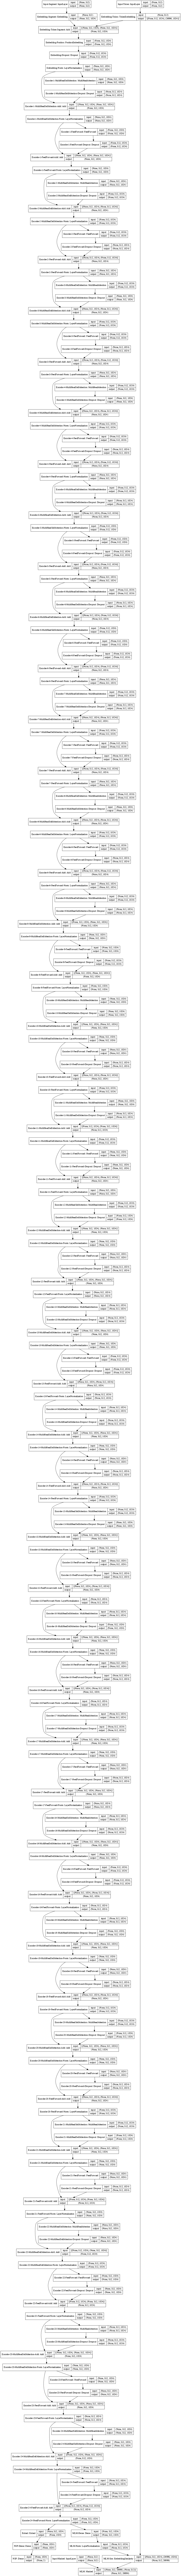

In [35]:
keras.utils.plot_model(model, show_shapes=True, dpi=50)

In [0]:
bert_inputs = model.inputs

In [0]:
bert_output = model.layers[-6].output

In [0]:
pooled_out = keras.layers.Dense(1, activation='sigmoid', kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.02), name='real_out')(bert_output)

In [0]:
clf_model = keras.models.Model(bert_inputs, pooled_out)

In [59]:
clf_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        (None, 512)          0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      (None, 512)          0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 512, 1024),  29691904    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 512, 1024)    2048        Input-Segment[0][0]              
____________________________________________________________________________________________

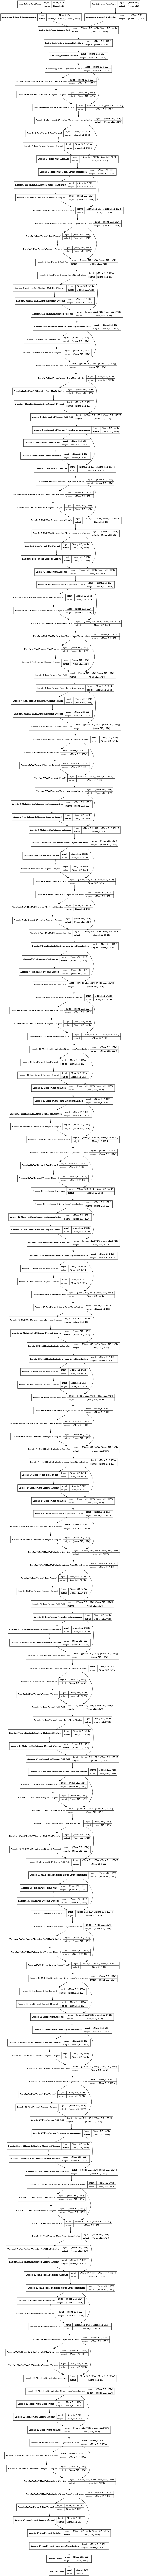

In [61]:
keras.utils.plot_model(clf_model, show_shapes=True, dpi=50)

In [62]:
clf_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Prepare Date


### Create token vocabulary

In [0]:
token_dict = keras_bert.load_vocabulary('/content/wwm_cased_L-24_H-1024_A-16/vocab.txt')

In [40]:
token_dict

{'[PAD]': 0,
 '[unused1]': 1,
 '[unused2]': 2,
 '[unused3]': 3,
 '[unused4]': 4,
 '[unused5]': 5,
 '[unused6]': 6,
 '[unused7]': 7,
 '[unused8]': 8,
 '[unused9]': 9,
 '[unused10]': 10,
 '[unused11]': 11,
 '[unused12]': 12,
 '[unused13]': 13,
 '[unused14]': 14,
 '[unused15]': 15,
 '[unused16]': 16,
 '[unused17]': 17,
 '[unused18]': 18,
 '[unused19]': 19,
 '[unused20]': 20,
 '[unused21]': 21,
 '[unused22]': 22,
 '[unused23]': 23,
 '[unused24]': 24,
 '[unused25]': 25,
 '[unused26]': 26,
 '[unused27]': 27,
 '[unused28]': 28,
 '[unused29]': 29,
 '[unused30]': 30,
 '[unused31]': 31,
 '[unused32]': 32,
 '[unused33]': 33,
 '[unused34]': 34,
 '[unused35]': 35,
 '[unused36]': 36,
 '[unused37]': 37,
 '[unused38]': 38,
 '[unused39]': 39,
 '[unused40]': 40,
 '[unused41]': 41,
 '[unused42]': 42,
 '[unused43]': 43,
 '[unused44]': 44,
 '[unused45]': 45,
 '[unused46]': 46,
 '[unused47]': 47,
 '[unused48]': 48,
 '[unused49]': 49,
 '[unused50]': 50,
 '[unused51]': 51,
 '[unused52]': 52,
 '[unused53]': 53

In [0]:
tokenizer = keras_bert.Tokenizer(token_dict)

In [44]:
tokenizer.encode("This is so cool. It's like, 'would you want yo")

([101,
  1142,
  1110,
  1177,
  4348,
  119,
  1122,
  112,
  188,
  1176,
  117,
  112,
  1156,
  1128,
  1328,
  26063,
  102],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
train_df.head(3)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.0,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:41.987077+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.0,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:42.870083+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.0,This is such an urgent design problem; kudos t...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:45.222647+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4


In [0]:
def target_binary(x):
  if x >= 0.5:
    return 1
  else:
    return 0
  
train_df['target'] = train_df['target'].apply(target_binary) 

In [0]:
from tqdm import tqdm

def convert_data(data_df):
  global tokenizer
  indices, segments, targets = [], [], []
  for i in tqdm(range(len(data_df))):
    ids, segments = tokenizer.encode(data_df['comment_text'][i], max_len = 512)
    indices.append(ids)
    segments.append(segments)
    targets.append(data_df['target'][i])
  items = list(zip(indices, segments, targets))
  np.random.shuffle(items)
  indices, segments, targets = zip(*items)
  indices = np.array(indices)
  return [indices, np.zeros_like(indices)], np.array(segments), np.array(targets)

In [0]:
def load_data(path, DATA_COLUMN = 'comment_text'):
    data_df = pd.read_csv(path, nrows=100000)
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_x, data_x_seg, data_y = convert_data(data_df)
    return data_x, data_x_seg, data_y

In [0]:
train_x, train_x_2, train_y = load_data('/content/train.csv')

In [98]:
train_x

[array([[ 101,  178, 1138, ...,    0,    0,    0],
        [ 101, 1128, 9424, ...,    0,    0,    0],
        [ 101, 1105, 1208, ...,    0,    0,    0],
        ...,
        [ 101, 2564,  117, ...,    0,    0,    0],
        [ 101,  178,  112, ...,    0,    0,    0],
        [ 101,  178, 1631, ...,    0,    0,    0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [107]:
train_x[1][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [99]:
train_x_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0,
       list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [100]:
train_y

array([0.        , 0.4       , 0.        , 0.        , 0.        ,
       0.8030303 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.2       , 0.2       ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.2       , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.16666667, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.16666667, 0.        , 0.4       ,
       0.        , 0.        , 0.        , 0.44      , 0.        ,
       0.        , 0.        , 0.        , 0.4       , 0.        ,
       0.        , 0.50704225, 0.        , 0.        , 0.     

In [0]:
class PaddingInputExample(object):
    """Fake example so the num input examples is a multiple of the batch size.
  When running eval/predict on the TPU, we need to pad the number of examples
  to be a multiple of the batch size, because the TPU requires a fixed batch
  size. The alternative is to drop the last batch, which is bad because it means
  the entire output data won't be generated.
  We use this class instead of `None` because treating `None` as padding
  battches could cause silent errors.
  """

class InputExample(object):
    """A single training/test example for simple sequence classification."""

    def __init__(self, guid, text_a, text_b=None, label=None):
        """Constructs a InputExample.
    Args:
      guid: Unique id for the example.
      text_a: string. The untokenized text of the first sequence. For single
        sequence tasks, only this sequence must be specified.
      text_b: (Optional) string. The untokenized text of the second sequence.
        Only must be specified for sequence pair tasks.
      label: (Optional) string. The label of the example. This should be
        specified for train and dev examples, but not for test examples.
    """
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label

        
def create_tokenizer_from_hub_module():
    """Get the vocab file and casing info from the Hub module."""
    bert_path = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"
    bert_module =  hub.Module(bert_path)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    vocab_file, do_lower_case = sess.run(
        [
            tokenization_info["vocab_file"],
            tokenization_info["do_lower_case"],
        ]
    )

    return FullTokenizer(vocab_file=vocab_file, do_lower_case=do_lower_case)

  
  
def convert_single_example(tokenizer, example, max_seq_length=256):
    """Converts a single `InputExample` into a single `InputFeatures`."""

    if isinstance(example, PaddingInputExample):
        input_ids = [0] * max_seq_length
        input_mask = [0] * max_seq_length
        segment_ids = [0] * max_seq_length
        label = 0
        return input_ids, input_mask, segment_ids, label

    tokens_a = tokenizer.tokenize(example.text_a)
    if len(tokens_a) > max_seq_length - 2:
        tokens_a = tokens_a[0 : (max_seq_length - 2)]

    tokens = []
    segment_ids = []
    tokens.append("[CLS]")
    segment_ids.append(0)
    for token in tokens_a:
        tokens.append(token)
        segment_ids.append(0)
    tokens.append("[SEP]")
    segment_ids.append(0)

    input_ids = tokenizer.convert_tokens_to_ids(tokens)

    # The mask has 1 for real tokens and 0 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [1] * len(input_ids)

    # Zero-pad up to the sequence length.
    while len(input_ids) < max_seq_length:
        input_ids.append(0)
        input_mask.append(0)
        segment_ids.append(0)

    assert len(input_ids) == max_seq_length
    assert len(input_mask) == max_seq_length
    assert len(segment_ids) == max_seq_length

    return input_ids, input_mask, segment_ids, example.label

  
  
def convert_examples_to_features(tokenizer, examples, max_seq_length=256):
    """Convert a set of `InputExample`s to a list of `InputFeatures`."""

    input_ids, input_masks, segment_ids, labels = [], [], [], []
    for example in tqdm_notebook(examples, desc="Converting examples to features"):
        input_id, input_mask, segment_id, label = convert_single_example(tokenizer, example, max_seq_length)
        
        input_ids.append(input_id)
        input_masks.append(input_mask)
        segment_ids.append(segment_id)
        labels.append(label)
    return (np.array(input_ids), np.array(input_masks), np.array(segment_ids), np.array(labels).reshape(-1, 1),)

  
def convert_text_to_examples(texts, labels):
    """Create InputExamples"""
    InputExamples = []
    for text, label in zip(texts, labels):
        InputExamples.append(
            InputExample(guid=None, text_a=" ".join(text), text_b=None, label=label)
        )
    return InputExamples

In [103]:
train_examples = convert_text_to_examples(train_text, train_label)
test_examples = convert_text_to_examples(test_text, test_label)

AttributeError: ignored